In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

2024-10-10 19:06:58.660052: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-10 19:06:58.682380: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-10 19:06:58.682398: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-10 19:06:58.682415: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-10 19:06:58.687383: I tensorflow/core/platform/cpu_feature_g

In [2]:
from sklearn.decomposition import PCA

In [3]:
df_combined = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/Combined_Omics_Mutated_Genes_Dataset.csv')
df_combined

,Unnamed: 0,GE_SPOP,GE_NKX3-1,GE_ZMYM3,GE_BRAF,GE_ATM,GE_CTNNB1,GE_FOXA1,CNA_SPOP,CNA_TP53,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
0,0,0.432423,0.576310,0.710846,0.401258,0.487204,0.822607,0.684537,0.386164,0.954066,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
1,1,0.651981,0.697055,0.645458,0.370666,0.426688,0.781097,0.593167,0.403145,0.974398,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
2,2,0.258006,0.582047,0.787792,0.405120,0.603989,0.757727,0.687300,0.398113,0.968373,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
3,3,0.509185,0.622602,0.598594,0.169027,0.175336,0.705212,0.379166,0.381761,0.948795,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
4,4,0.409782,0.722197,0.757623,0.290225,0.531428,0.745461,0.555879,0.396226,0.960090,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,285,0.460518,0.610432,0.415766,0.173626,0.247439,0.654671,0.367789,0.399371,0.970633,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
286,286,0.210884,0.568091,0.633152,0.222890,0.317335,0.450947,0.720822,0.437134,0.970529,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
287,287,0.254737,0.609776,0.569000,0.261703,0.473819,0.433723,0.547904,0.405660,0.977410,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
288,288,0.694129,0.600637,0.332852,0.198713,0.235125,0.688736,0.402767,0.653459,0.597139,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0


In [4]:
df_combined.drop('Unnamed: 0', axis = 1, inplace = True)
df_combined

,GE_SPOP,GE_NKX3-1,GE_ZMYM3,GE_BRAF,GE_ATM,GE_CTNNB1,GE_FOXA1,CNA_SPOP,CNA_TP53,CNA_MED12,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
0,0.432423,0.576310,0.710846,0.401258,0.487204,0.822607,0.684537,0.386164,0.954066,0.705706,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
1,0.651981,0.697055,0.645458,0.370666,0.426688,0.781097,0.593167,0.403145,0.974398,0.776777,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
2,0.258006,0.582047,0.787792,0.405120,0.603989,0.757727,0.687300,0.398113,0.968373,0.707708,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
3,0.509185,0.622602,0.598594,0.169027,0.175336,0.705212,0.379166,0.381761,0.948795,0.706707,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
4,0.409782,0.722197,0.757623,0.290225,0.531428,0.745461,0.555879,0.396226,0.960090,0.760761,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.460518,0.610432,0.415766,0.173626,0.247439,0.654671,0.367789,0.399371,0.970633,0.774775,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
286,0.210884,0.568091,0.633152,0.222890,0.317335,0.450947,0.720822,0.437134,0.970529,0.777148,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
287,0.254737,0.609776,0.569000,0.261703,0.473819,0.433723,0.547904,0.405660,0.977410,0.765766,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
288,0.694129,0.600637,0.332852,0.198713,0.235125,0.688736,0.402767,0.653459,0.597139,0.774775,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0


# **PCA**

In [5]:
pca = PCA(n_components = None)
pca.fit(df_combined.drop('Gleason_Score', axis = 1))
evr = pca.explained_variance_ratio_
cevr = np.cumsum(evr)

In [6]:
evr

array([2.18245577e-01, 2.13557127e-01, 1.15933802e-01, 6.36192116e-02,
       5.64328583e-02, 4.69043652e-02, 4.15957996e-02, 3.74552038e-02,
       3.26990021e-02, 2.55791596e-02, 2.40052187e-02, 2.23291470e-02,
       1.72102906e-02, 1.46393956e-02, 1.38446281e-02, 1.22036022e-02,
       1.03313543e-02, 9.83835647e-03, 8.50242129e-03, 7.43333427e-03,
       5.70935159e-03, 1.93079323e-03, 1.58600489e-33, 1.58600489e-33,
       1.58600489e-33, 1.58600489e-33, 1.58600489e-33, 1.58600489e-33,
       1.58600489e-33, 1.58600489e-33, 1.58600489e-33])

In [7]:
len(evr)

31

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

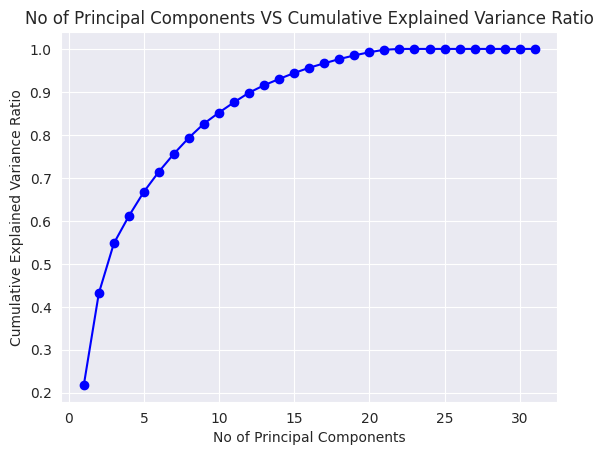

In [8]:
plt.plot(range(1, len(cevr) + 1), cevr, color = 'b', marker = 'o')
plt.title('No of Principal Components VS Cumulative Explained Variance Ratio')
plt.xlabel('No of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

**Note: From the above code it is evident that around half of the features can be removed since just retaining around 12 features preserves almost 90% of the variance.**

In [9]:
#Determining the exact no of features that capture 90% of the variance
X = df_combined.drop('Gleason_Score', axis = 1)
pca_1 = PCA(n_components = 0.9).fit(X)
print(f'No of components that capture 90% of the variance: {pca_1.n_components_}')

No of components that capture 90% of the variance: 13


Text(0, 0.5, 'Explained Variance')

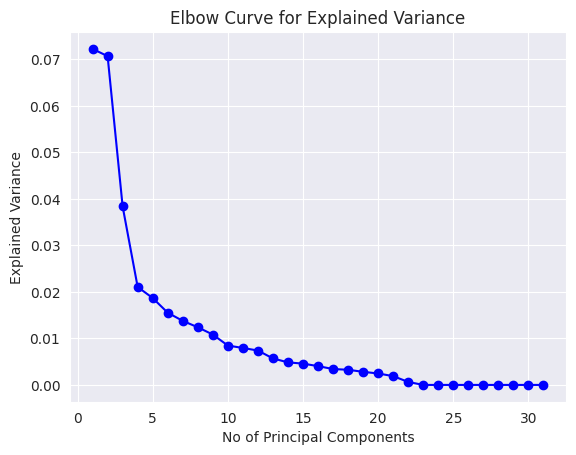

In [10]:
#Checking the elbow curve for the pca explained variance for entire dataset
ev = pca.explained_variance_
plt.plot(range(1, len(ev) + 1), ev, marker = 'o', color = 'b')
plt.title('Elbow Curve for Explained Variance')
plt.xlabel('No of Principal Components')
plt.ylabel('Explained Variance')

**The elbow point for the curve is around the 5 principal component mark. However since, we want to preserve atleast 90% of the variance of the dataset. We will be going with 13 principal components**

In [11]:
pca_2 = PCA(n_components = 13)
X_pca = pca_2.fit_transform(X)

In [12]:
X_pca

array([[-0.16955743,  0.23906123, -0.0739576 , ..., -0.06995495,
         0.19120276, -0.02286938],
       [ 0.25763346, -0.10852396, -0.16726542, ...,  0.00101825,
        -0.17265741,  0.01457351],
       [-0.14871896,  0.37527018, -0.29758547, ..., -0.10112503,
         0.12811441, -0.10904346],
       ...,
       [-0.40503955, -0.05583377,  0.12887212, ..., -0.04325956,
         0.00238215, -0.0309074 ],
       [-0.03006289, -0.40877274, -0.19998341, ..., -0.02873859,
        -0.14169136,  0.02572195],
       [ 0.41792975, -0.17884904,  0.07778473, ..., -0.10995412,
         0.03766616,  0.02263977]])

In [13]:
X_pca.shape

(290, 13)

In [14]:
y = df_combined['Gleason_Score']
y

0      0
1      0
2      0
3      1
4      0
      ..
285    0
286    1
287    1
288    0
289    1
Name: Gleason_Score, Length: 290, dtype: int64

# **Autoencoders**

In [15]:
#Vanilla Autocomplete autoencoder
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
input_dim = X_pca.shape[1]
encoding_dim = 5
en_input = Input(shape = (input_dim, ))
en_layer = Dense(encoding_dim, activation = 'relu')(en_input)
de_layer = Dense(input_dim, activation = 'sigmoid')(en_layer)
auto_encoder_model = Model(en_input, de_layer)
auto_encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 13)                78        
                                                                 
Total params: 148 (592.00 Byte)
Trainable params: 148 (592.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-10-10 19:07:15.652907: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-10-10 19:07:15.652933: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: pop-os
2024-10-10 19:07:15.652938: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: pop-os
2024-10-10 19:07:15.653054: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 550.67.0
2024-10-10 19:07:15.653067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 550.67.0
2024-10-10 19:07:15.653070: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 550.67.0


In [16]:
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam
auto_encoder_model.compile(loss = mean_squared_error, optimizer = Adam(learning_rate = 0.001))

**Callbacks for the autoencoder model**

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lrs = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 10, min_lr = 1e-4)
es = EarlyStopping(monitor = 'val_loss', patience = 10)

In [18]:
#Fitting the model on the pca transformed dataset
history_1 = auto_encoder_model.fit(X_pca, X_pca, validation_split = 0.2, callbacks = [lrs, es], epochs = 1000)

Epoch 1/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.2668 - val_loss: 0.2748 - lr: 0.0010
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2636 - val_loss: 0.2717 - lr: 0.0010
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2605 - val_loss: 0.2685 - lr: 0.0010
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2573 - val_loss: 0.2653 - lr: 0.0010
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2542 - val_loss: 0.2620 - lr: 0.0010
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2509 - val_loss: 0.2587 - lr: 0.0010
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2477 - val_loss: 0.2554 - lr: 0.0010
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2443 - val_loss: 0.2520 - lr: 0.0010
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2408 - val_loss: 0.2485 - lr: 0.0010


In [19]:
X_latent = auto_encoder_model.predict(X_pca)

10/10 [==============================] - 0s 699us/step


In [20]:
X_latent

array([[0.00800698, 0.28682312, 0.06205846, ..., 0.00763846, 0.0091365 ,
        0.00994144],
       [0.22472438, 0.02100316, 0.02388994, ..., 0.02215241, 0.00861628,
        0.01552576],
       [0.0084563 , 0.3661029 , 0.01542528, ..., 0.00162979, 0.0015521 ,
        0.0026819 ],
       ...,
       [0.00212867, 0.01976403, 0.06913929, ..., 0.00420902, 0.00413106,
        0.0038087 ],
       [0.03356243, 0.00125265, 0.02017959, ..., 0.00849784, 0.00217302,
        0.00246616],
       [0.41776752, 0.01630967, 0.03035293, ..., 0.02470383, 0.00663873,
        0.01109374]], dtype=float32)

In [21]:
X_pca

array([[-0.16955743,  0.23906123, -0.0739576 , ..., -0.06995495,
         0.19120276, -0.02286938],
       [ 0.25763346, -0.10852396, -0.16726542, ...,  0.00101825,
        -0.17265741,  0.01457351],
       [-0.14871896,  0.37527018, -0.29758547, ..., -0.10112503,
         0.12811441, -0.10904346],
       ...,
       [-0.40503955, -0.05583377,  0.12887212, ..., -0.04325956,
         0.00238215, -0.0309074 ],
       [-0.03006289, -0.40877274, -0.19998341, ..., -0.02873859,
        -0.14169136,  0.02572195],
       [ 0.41792975, -0.17884904,  0.07778473, ..., -0.10995412,
         0.03766616,  0.02263977]])

In [22]:
print(f'Reconstruction error for the autoencoder: {tf.reduce_mean(mean_squared_error(X_pca, X_latent), axis = -1)}')

Reconstruction error for the autoencoder: 0.017459068447351456


**Using t-SNE for visualizing the data**

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 42)
X_latent_tsne = tsne.fit_transform(X_latent)

In [24]:
y

0      0
1      0
2      0
3      1
4      0
      ..
285    0
286    1
287    1
288    0
289    1
Name: Gleason_Score, Length: 290, dtype: int64

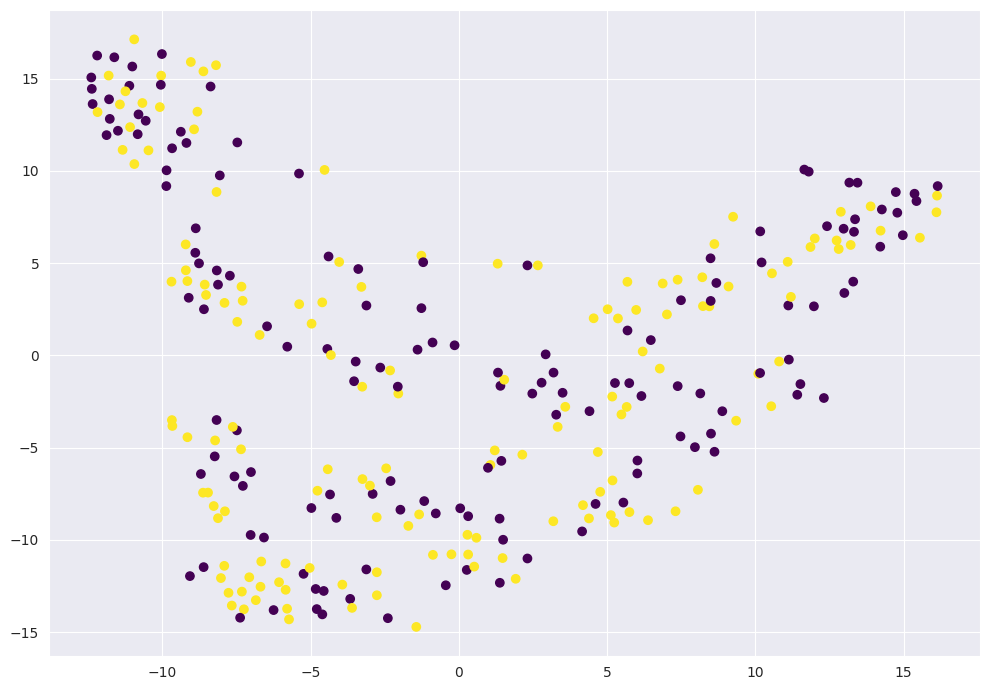

In [25]:
#Plotting the 2-D representation
plt.figure(figsize = (10, 7))
plt.scatter(X_latent_tsne[:, 0], X_latent_tsne[:, 1], cmap = 'viridis', c = y)
plt.tight_layout()

# **Now just using the 5 latent space features from autoencoder**

In [26]:
encoder_model = Model(en_input, en_layer)

In [27]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 5)                 70        
                                                                 
Total params: 70 (280.00 Byte)
Trainable params: 70 (280.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
X_reduced_latent = encoder_model.predict(X_pca)

10/10 [==============================] - 0s 489us/step


In [29]:
X_reduced_latent

array([[0.21841246, 1.166353  , 1.5356028 , 0.6934084 , 0.2125467 ],
       [0.62526524, 1.0213603 , 0.18915474, 1.2498509 , 0.8909152 ],
       [0.        , 2.0488162 , 1.667573  , 0.8786216 , 0.5381752 ],
       ...,
       [1.4287585 , 0.70853055, 1.6607893 , 0.91252905, 0.38681912],
       [1.7491794 , 0.29186356, 0.65834886, 1.6169081 , 1.418532  ],
       [1.0875195 , 0.7313336 , 0.        , 0.8260462 , 1.5233946 ]],
      dtype=float32)

# **Train-Val-Test split**

In [51]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X_reduced_latent, y, test_size = 0.3, random_state = 42)

In [53]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.3, random_state = 42)

# **Using this for a demo classification**

In [48]:
# ANN binary classifier
from tensorflow.keras.layers import Dropout
input_layer = Input(shape = (X_reduced_latent.shape[1]))
#fc_1 = Dense(32, activation = 'relu')(input_layer)
#dp_1 = Dropout(0.2)(fc_1)
#fc_2 = Dense(32, activation = 'relu')(dp_1)
#dp_2 = Dropout(0.2)(fc_2)
classifier_layer = Dense(1, activation = 'sigmoid')(input_layer)
ann_classifier_model = Model(input_layer, classifier_layer)

In [50]:
from tensorflow.keras.losses import BinaryCrossentropy
ann_classifier_model.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate= 0.001), metrics = ['accuracy'])

In [52]:
X_train.shape

(203, 5)

In [49]:
ann_classifier_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
X_val.shape

(27, 5)

In [55]:
X_test.shape

(60, 5)

In [56]:
history_ann = ann_classifier_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10)

Epoch 1/10
7/7 [==============================] - 0s 11ms/step - loss: 0.8230 - accuracy: 0.4926 - val_loss: 0.8764 - val_accuracy: 0.5185
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.8160 - accuracy: 0.4926 - val_loss: 0.8675 - val_accuracy: 0.5185
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.8095 - accuracy: 0.4877 - val_loss: 0.8588 - val_accuracy: 0.4815
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.8035 - accuracy: 0.4926 - val_loss: 0.8504 - val_accuracy: 0.4444
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7975 - accuracy: 0.4975 - val_loss: 0.8427 - val_accuracy: 0.4444
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7918 - accuracy: 0.4975 - val_loss: 0.8351 - val_accuracy: 0.4444
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7861 - accuracy: 0.5074 - val_loss: 0.8280 - val_accuracy: 0.4444
Epoch 8/10
7/7 [=================